Accuracy: 0.8911825420230021
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.62      0.20      0.31      1598

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



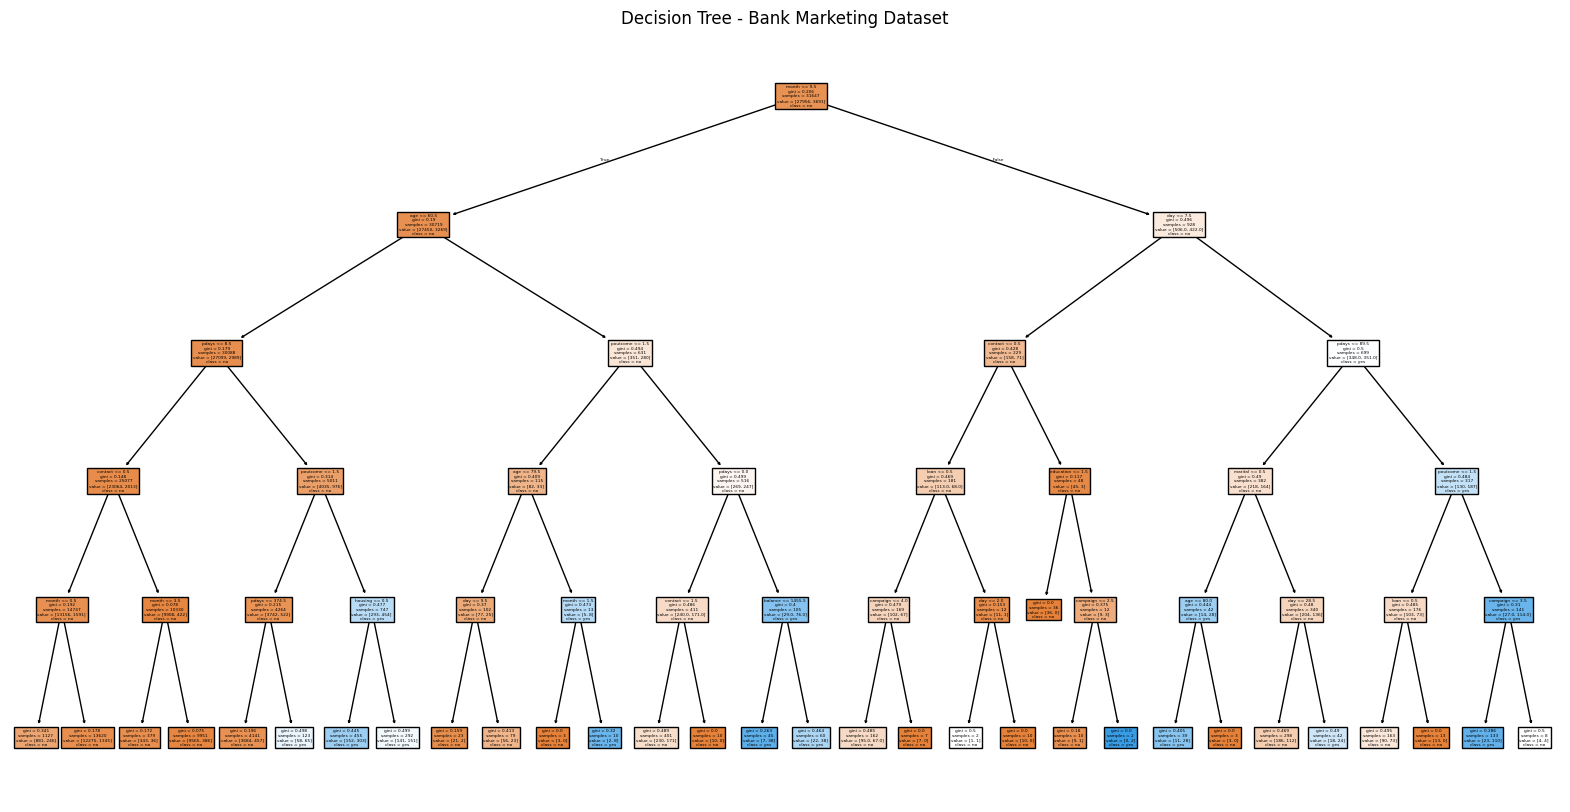

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("bank-full.csv", sep=';', engine='python')
df = df.drop(columns=['duration'])

df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["no", "yes"], filled=True)
plt.title("Decision Tree - Bank Marketing Dataset")
plt.show()